Realizando os Imports necessários

In [1]:
import pandas as pd
import basedosdados as bd
import matplotlib.pyplot as plt

Configurando o Google Cloud 

In [2]:
project_id = "xxxxxx-xxxxxxxxxxx-xxxxxx"

## Verificando tamanho dos datasets escolhidos e outras informações sobre o dataset

INEP IDEB - Tabela Brasil

In [3]:
query_1 = """
SELECT COUNT(*) AS linhas
FROM `basedosdados.br_inep_ideb.brasil`
"""
que1 = bd.read_sql(query_1, billing_project_id=project_id)
que1.head()

Downloading: 100%|██████████|


,linhas
0,140


In [4]:
query_2 = """
SELECT * 
FROM `basedosdados.br_inep_ideb.brasil`
"""
df_ideb_brasil = bd.read_sql(query_2, billing_project_id=project_id)
df_ideb_brasil.head()

Downloading: 100%|██████████|


,ano,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,privada,medio,todos (1-4),92.7,0.933066,333.30,306.88,5.964842,5.6,NaN
1,2005,estadual,medio,todos (1-4),70.5,0.747708,260.02,248.69,4.064599,3.0,NaN
2,2005,total,medio,todos (1-4),73.2,0.771854,271.29,257.60,4.356054,3.4,NaN
3,2005,publica,medio,todos (1-4),70.6,0.750616,260.80,249.27,4.084188,3.1,NaN
4,2005,total,fundamental,finais (6-9),77.0,0.772003,239.52,231.82,4.522333,3.5,NaN


In [5]:
df_ideb_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          140 non-null    Int64  
 1   rede                         140 non-null    object 
 2   ensino                       140 non-null    object 
 3   anos_escolares               140 non-null    object 
 4   taxa_aprovacao               140 non-null    float64
 5   indicador_rendimento         140 non-null    float64
 6   nota_saeb_matematica         140 non-null    float64
 7   nota_saeb_lingua_portuguesa  140 non-null    float64
 8   nota_saeb_media_padronizada  140 non-null    float64
 9   ideb                         140 non-null    float64
 10  projecao                     98 non-null     float64
dtypes: Int64(1), float64(7), object(3)
memory usage: 12.3+ KB


Essa tabela traz algumas informações interessantes sobre o desenvolvimento escolar, seperado por ano.

IDEB - Região

In [6]:
query_3 = """
SELECT COUNT(*) AS linhas
FROM `basedosdados.br_inep_ideb.regiao`
"""
que2 = bd.read_sql(query_3, billing_project_id=project_id)
que2.head()

Downloading: 100%|██████████|


,linhas
0,550


In [7]:
query_3 = """
SELECT *
FROM `basedosdados.br_inep_ideb.regiao`
"""
df_ideb_regiao = bd.read_sql(query_3, billing_project_id=project_id)
df_ideb_regiao.head()

Downloading: 100%|██████████|


,ano,regiao,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,Nordeste,total,medio,todos (1-4),70.9,0.754940,258.16,246.22,4.001304,3.0,NaN
1,2013,Nordeste,estadual,medio,todos (1-4),77.5,0.803350,246.19,241.55,3.763397,3.0,3.3
2,2011,Nordeste,estadual,medio,todos (1-4),74.2,0.778385,248.80,248.11,3.898408,3.0,3.0
3,2007,Centro-Oeste,estadual,medio,todos (1-4),69.9,0.728263,262.72,252.77,4.163534,3.0,2.9
4,2009,Sudeste,estadual,medio,todos (1-4),75.3,0.789505,270.70,266.26,4.477549,3.5,3.3


In [8]:
df_ideb_regiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          550 non-null    Int64  
 1   regiao                       550 non-null    object 
 2   rede                         550 non-null    object 
 3   ensino                       550 non-null    object 
 4   anos_escolares               550 non-null    object 
 5   taxa_aprovacao               550 non-null    float64
 6   indicador_rendimento         550 non-null    float64
 7   nota_saeb_matematica         550 non-null    float64
 8   nota_saeb_lingua_portuguesa  550 non-null    float64
 9   nota_saeb_media_padronizada  550 non-null    float64
 10  ideb                         550 non-null    float64
 11  projecao                     385 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 52.2+ KB


IDEB - Municipio

In [9]:
query_4 = """
SELECT COUNT(*) AS linhas
FROM `basedosdados.br_inep_ideb.municipio`
"""
que3 = bd.read_sql(query_4, billing_project_id=project_id)
que3.head()

Downloading: 100%|██████████|


,linhas
0,323991


In [10]:
query_5 = """
SELECT *
FROM `basedosdados.br_inep_ideb.municipio`
WHERE indicador_rendimento IS NOT NULL AND taxa_aprovacao IS NOT NULL
"""
df_ideb_municipio = bd.read_sql(query_5, billing_project_id=project_id)
df_ideb_municipio.head()

Downloading: 100%|██████████|


,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2009,MG,3155108,municipal,fundamental,finais (6-9),83.1,0.828705,NaN,NaN,NaN,NaN,3.2
1,2009,GO,5219803,municipal,fundamental,finais (6-9),72.4,0.742764,NaN,NaN,NaN,NaN,2.8
2,2009,RS,4302154,estadual,fundamental,finais (6-9),83.2,0.844211,NaN,NaN,NaN,NaN,4.5
3,2009,AL,2706000,estadual,fundamental,finais (6-9),84.9,0.852070,NaN,NaN,NaN,NaN,3.1
4,2009,TO,1716604,municipal,fundamental,finais (6-9),75.7,0.762417,NaN,NaN,NaN,NaN,2.9


In [11]:
df_ideb_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291984 entries, 0 to 291983
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ano                          291984 non-null  Int64  
 1   sigla_uf                     291984 non-null  object 
 2   id_municipio                 291984 non-null  object 
 3   rede                         291984 non-null  object 
 4   ensino                       291984 non-null  object 
 5   anos_escolares               291984 non-null  object 
 6   taxa_aprovacao               291984 non-null  float64
 7   indicador_rendimento         291984 non-null  float64
 8   nota_saeb_matematica         274453 non-null  float64
 9   nota_saeb_lingua_portuguesa  274453 non-null  float64
 10  nota_saeb_media_padronizada  274453 non-null  float64
 11  ideb                         274453 non-null  float64
 12  projecao                     179132 non-null  float64
dtyp

## Base de dados do Enem

Trazendos os dados do questionário socioeconômico 2022

In [12]:
query_6 = """
WITH 
dicionario_Q001 AS (
    SELECT
        chave AS chave_Q001,
        valor AS descricao_Q001
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q001'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q002 AS (
    SELECT
        chave AS chave_Q002,
        valor AS descricao_Q002
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q002'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q003 AS (
    SELECT
        chave AS chave_Q003,
        valor AS descricao_Q003
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q003'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q004 AS (
    SELECT
        chave AS chave_Q004,
        valor AS descricao_Q004
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q004'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q005 AS (
    SELECT
        chave AS chave_Q005,
        valor AS descricao_Q005
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q005'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q006 AS (
    SELECT
        chave AS chave_Q006,
        valor AS descricao_Q006
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q006'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q007 AS (
    SELECT
        chave AS chave_Q007,
        valor AS descricao_Q007
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q007'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q008 AS (
    SELECT
        chave AS chave_Q008,
        valor AS descricao_Q008
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q008'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q009 AS (
    SELECT
        chave AS chave_Q009,
        valor AS descricao_Q009
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q009'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q010 AS (
    SELECT
        chave AS chave_Q010,
        valor AS descricao_Q010
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q010'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q011 AS (
    SELECT
        chave AS chave_Q011,
        valor AS descricao_Q011
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q011'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q012 AS (
    SELECT
        chave AS chave_Q012,
        valor AS descricao_Q012
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q012'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q013 AS (
    SELECT
        chave AS chave_Q013,
        valor AS descricao_Q013
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q013'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q014 AS (
    SELECT
        chave AS chave_Q014,
        valor AS descricao_Q014
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q014'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q015 AS (
    SELECT
        chave AS chave_Q015,
        valor AS descricao_Q015
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q015'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q016 AS (
    SELECT
        chave AS chave_Q016,
        valor AS descricao_Q016
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q016'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q017 AS (
    SELECT
        chave AS chave_Q017,
        valor AS descricao_Q017
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q017'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q018 AS (
    SELECT
        chave AS chave_Q018,
        valor AS descricao_Q018
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q018'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q019 AS (
    SELECT
        chave AS chave_Q019,
        valor AS descricao_Q019
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q019'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q020 AS (
    SELECT
        chave AS chave_Q020,
        valor AS descricao_Q020
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q020'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q021 AS (
    SELECT
        chave AS chave_Q021,
        valor AS descricao_Q021
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q021'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q022 AS (
    SELECT
        chave AS chave_Q022,
        valor AS descricao_Q022
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q022'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q023 AS (
    SELECT
        chave AS chave_Q023,
        valor AS descricao_Q023
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q023'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q024 AS (
    SELECT
        chave AS chave_Q024,
        valor AS descricao_Q024
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q024'
        AND id_tabela = 'questionario_socioeconomico_2022'
),
dicionario_Q025 AS (
    SELECT
        chave AS chave_Q025,
        valor AS descricao_Q025
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'Q025'
        AND id_tabela = 'questionario_socioeconomico_2022'
)
SELECT
    dados.id_inscricao as id_inscricao,
    descricao_Q001 AS Q001,
    descricao_Q002 AS Q002,
    descricao_Q003 AS Q003,
    descricao_Q004 AS Q004,
    descricao_Q005 AS Q005,
    descricao_Q006 AS Q006,
    descricao_Q007 AS Q007,
    descricao_Q008 AS Q008,
    descricao_Q009 AS Q009,
    descricao_Q010 AS Q010,
    descricao_Q011 AS Q011,
    descricao_Q012 AS Q012,
    descricao_Q013 AS Q013,
    descricao_Q014 AS Q014,
    descricao_Q015 AS Q015,
    descricao_Q016 AS Q016,
    descricao_Q017 AS Q017,
    descricao_Q018 AS Q018,
    descricao_Q019 AS Q019,
    descricao_Q020 AS Q020,
    descricao_Q021 AS Q021,
    descricao_Q022 AS Q022,
    descricao_Q023 AS Q023,
    descricao_Q024 AS Q024,
    descricao_Q025 AS Q025
FROM `basedosdados.br_inep_enem.questionario_socioeconomico_2022` AS dados
LEFT JOIN `dicionario_Q001`
    ON dados.Q001 = chave_Q001
LEFT JOIN `dicionario_Q002`
    ON dados.Q002 = chave_Q002
LEFT JOIN `dicionario_Q003`
    ON dados.Q003 = chave_Q003
LEFT JOIN `dicionario_Q004`
    ON dados.Q004 = chave_Q004
LEFT JOIN `dicionario_Q005`
    ON dados.Q005 = chave_Q005
LEFT JOIN `dicionario_Q006`
    ON dados.Q006 = chave_Q006
LEFT JOIN `dicionario_Q007`
    ON dados.Q007 = chave_Q007
LEFT JOIN `dicionario_Q008`
    ON dados.Q008 = chave_Q008
LEFT JOIN `dicionario_Q009`
    ON dados.Q009 = chave_Q009
LEFT JOIN `dicionario_Q010`
    ON dados.Q010 = chave_Q010
LEFT JOIN `dicionario_Q011`
    ON dados.Q011 = chave_Q011
LEFT JOIN `dicionario_Q012`
    ON dados.Q012 = chave_Q012
LEFT JOIN `dicionario_Q013`
    ON dados.Q013 = chave_Q013
LEFT JOIN `dicionario_Q014`
    ON dados.Q014 = chave_Q014
LEFT JOIN `dicionario_Q015`
    ON dados.Q015 = chave_Q015
LEFT JOIN `dicionario_Q016`
    ON dados.Q016 = chave_Q016
LEFT JOIN `dicionario_Q017`
    ON dados.Q017 = chave_Q017
LEFT JOIN `dicionario_Q018`
    ON dados.Q018 = chave_Q018
LEFT JOIN `dicionario_Q019`
    ON dados.Q019 = chave_Q019
LEFT JOIN `dicionario_Q020`
    ON dados.Q020 = chave_Q020
LEFT JOIN `dicionario_Q021`
    ON dados.Q021 = chave_Q021
LEFT JOIN `dicionario_Q022`
    ON dados.Q022 = chave_Q022
LEFT JOIN `dicionario_Q023`
    ON dados.Q023 = chave_Q023
LEFT JOIN `dicionario_Q024`
    ON dados.Q024 = chave_Q024
LEFT JOIN `dicionario_Q025`
    ON dados.Q025 = chave_Q025
LIMIT 1000000
"""
df_enem_2022_socioeconomico = bd.read_sql(query_6, billing_project_id=project_id)

Downloading: 100%|██████████|


In [13]:
df_enem_2022_socioeconomico.head()

,id_inscricao,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057044320,Nunca estudou.,Não completou a 4ª série/5º ano do Ensino Fund...,"Grupo 1: Lavrador, agricultor sem empregados, ...","Grupo 1: Lavradora, agricultora sem empregados...","1, pois moro sozinho(a).",Nenhuma Renda,Não.,"Sim, um.","Sim, um.",...,Não.,Não.,Não.,"Sim, uma.",Não.,Não.,"Sim, um.",Não.,Não.,Sim.
1,210056607277,Nunca estudou.,Nunca estudou.,"Grupo 1: Lavrador, agricultor sem empregados, ...","Grupo 1: Lavradora, agricultora sem empregados...",2,Nenhuma Renda,Não.,"Sim, um.","Sim, dois.",...,Não.,Não.,Não.,"Sim, uma.",Não.,Não.,"Sim, dois.",Não.,Não.,Sim.
2,210057194778,Nunca estudou.,Nunca estudou.,"Grupo 1: Lavrador, agricultor sem empregados, ...",Não sei.,"1, pois moro sozinho(a).",Nenhuma Renda,Não.,"Sim, um.","Sim, um.",...,Não.,Não.,Não.,Não.,Não.,Não.,Não.,Não.,Não.,Não.
3,210057927408,Nunca estudou.,Nunca estudou.,"Grupo 1: Lavrador, agricultor sem empregados, ...","Grupo 1: Lavradora, agricultora sem empregados...",7,Nenhuma Renda,Não.,"Sim, um.","Sim, três.",...,Não.,Não.,Não.,"Sim, uma.",Não.,Não.,"Sim, dois.",Não.,Não.,Sim.
4,210056661069,Nunca estudou.,Nunca estudou.,"Grupo 1: Lavrador, agricultor sem empregados, ...","Grupo 1: Lavradora, agricultora sem empregados...",2,Nenhuma Renda,Não.,"Sim, um.","Sim, dois.",...,Não.,Não.,Não.,"Sim, uma.",Não.,Não.,"Sim, um.",Não.,Não.,Sim.


Agora vou trazer os microdados da prova enem 2022

In [14]:
query_7 = """
WITH 
dicionario_cor_raca AS (
    SELECT
        chave AS chave_cor_raca,
        valor AS descricao_cor_raca
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        nome_coluna = 'cor_raca'
        AND id_tabela = 'microdados'
),
dicionario_tipo_escola AS (
    SELECT
        chave AS chave_tipo_escola,
        valor AS descricao_tipo_escola
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        nome_coluna = 'tipo_escola'
        AND id_tabela = 'microdados'
),
dicionario_ensino AS (
    SELECT
        chave AS chave_ensino,
        valor AS descricao_ensino
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        nome_coluna = 'ensino'
        AND id_tabela = 'microdados'
),
dicionario_localizacao_escola AS (
    SELECT
        chave AS chave_localizacao_escola,
        valor AS descricao_localizacao_escola
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        nome_coluna = 'localizacao_escola'
        AND id_tabela = 'microdados'
),
dicionario_presenca_matematica AS (
    SELECT
        chave AS chave_presenca_matematica,
        valor AS descricao_presenca_matematica
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        nome_coluna = 'presenca_matematica'
        AND id_tabela = 'microdados'
),
dicionario_presenca_redacao AS (
    SELECT
        chave AS chave_presenca_redacao,
        valor AS descricao_presenca_redacao
    FROM `basedosdados.br_inep_enem.dicionario`
    WHERE
        nome_coluna = 'presenca_redacao'
        AND id_tabela = 'microdados'
)
SELECT 
    dados.ano AS ano,
    dados.id_inscricao AS id_inscricao,
    MAX(descricao_cor_raca) AS cor_raca,
    MAX(descricao_tipo_escola) AS tipo_escola,
    MAX(descricao_ensino) AS ensino,
    dados.id_municipio_escola AS id_municipio_escola,
    MAX(diretorio_id_municipio_escola.nome) AS id_municipio_escola_nome,
    MAX(descricao_localizacao_escola) AS localizacao_escola,
    MAX(descricao_presenca_matematica) AS presenca_matematica,
    MAX(dados.nota_ciencias_natureza) AS nota_ciencias_natureza,
    MAX(dados.nota_ciencias_humanas) AS nota_ciencias_humanas,
    MAX(dados.nota_linguagens_codigos) AS nota_linguagens_codigos,
    MAX(dados.nota_matematica) AS nota_matematica,
    MAX(descricao_presenca_redacao) AS presenca_redacao,
    MAX(dados.nota_redacao) AS nota_redacao
FROM `basedosdados.br_inep_enem.microdados` AS dados
LEFT JOIN `dicionario_cor_raca`
    ON dados.cor_raca = chave_cor_raca
LEFT JOIN `dicionario_tipo_escola`
    ON dados.tipo_escola = chave_tipo_escola
LEFT JOIN `dicionario_ensino`
    ON dados.ensino = chave_ensino
LEFT JOIN (SELECT DISTINCT id_municipio, nome FROM `basedosdados.br_bd_diretorios_brasil.municipio`) AS diretorio_id_municipio_escola
    ON dados.id_municipio_escola = diretorio_id_municipio_escola.id_municipio
LEFT JOIN `dicionario_localizacao_escola`
    ON dados.localizacao_escola = chave_localizacao_escola
LEFT JOIN `dicionario_presenca_matematica`
    ON dados.presenca_matematica = chave_presenca_matematica
LEFT JOIN `dicionario_presenca_redacao`
    ON dados.presenca_redacao = chave_presenca_redacao
WHERE ano = 2022 
  AND presenca_matematica = '1' 
  AND presenca_redacao = '1' 
  AND localizacao_escola IS NOT NULL
GROUP BY dados.ano, dados.id_inscricao, dados.id_municipio_escola
LIMIT 1000000
"""
df_enem_2022 = bd.read_sql(query_7, billing_project_id=project_id)

Downloading: 100%|██████████|


Verificando se temos valores nulos

In [15]:
df_enem_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659252 entries, 0 to 659251
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ano                       659252 non-null  Int64  
 1   id_inscricao              659252 non-null  object 
 2   cor_raca                  659252 non-null  object 
 3   tipo_escola               659252 non-null  object 
 4   ensino                    649703 non-null  object 
 5   id_municipio_escola       659252 non-null  object 
 6   id_municipio_escola_nome  659252 non-null  object 
 7   localizacao_escola        659252 non-null  object 
 8   presenca_matematica       659252 non-null  object 
 9   nota_ciencias_natureza    659252 non-null  float64
 10  nota_ciencias_humanas     659252 non-null  float64
 11  nota_linguagens_codigos   659252 non-null  float64
 12  nota_matematica           659252 non-null  float64
 13  presenca_redacao          659252 non-null  o

In [16]:
df_enem_2022.head()

,ano,id_inscricao,cor_raca,tipo_escola,ensino,id_municipio_escola,id_municipio_escola_nome,localizacao_escola,presenca_matematica,nota_ciencias_natureza,nota_ciencias_humanas,nota_linguagens_codigos,nota_matematica,presenca_redacao,nota_redacao
0,2022,210054569150,Branca,Pública,Ensino Regular,4307401,Esmeralda,Urbana,Presente na prova,400.4,401.7,400.9,438.4,Sem problemas,300.0
1,2022,210055366328,Parda,Pública,Ensino Regular,5219902,São Francisco de Goiás,Urbana,Presente na prova,429.2,455.9,467.8,484.7,Sem problemas,280.0
2,2022,210056174070,Parda,Pública,Ensino Regular,2111300,São Luís,Urbana,Presente na prova,409.0,448.3,407.9,460.3,Sem problemas,300.0
3,2022,210056413720,Parda,Pública,Ensino Regular,2304400,Fortaleza,Urbana,Presente na prova,423.9,575.9,482.6,456.9,Sem problemas,300.0
4,2022,210057712874,Parda,Pública,Ensino Regular,2305407,Icó,Urbana,Presente na prova,406.0,389.6,380.2,389.7,Sem problemas,280.0


Um dado que eu queria era o id_municipio e infelizmente não temos nenhum. Então irei utilizar como base id_municipio_escola.

Verificando as informações do dataframe df_enem_2022_socioeconomico

In [17]:
df_enem_2022_socioeconomico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   id_inscricao  1000000 non-null  object
 1   Q001          1000000 non-null  object
 2   Q002          1000000 non-null  object
 3   Q003          1000000 non-null  object
 4   Q004          1000000 non-null  object
 5   Q005          1000000 non-null  object
 6   Q006          1000000 non-null  object
 7   Q007          1000000 non-null  object
 8   Q008          1000000 non-null  object
 9   Q009          1000000 non-null  object
 10  Q010          1000000 non-null  object
 11  Q011          1000000 non-null  object
 12  Q012          1000000 non-null  object
 13  Q013          1000000 non-null  object
 14  Q014          1000000 non-null  object
 15  Q015          1000000 non-null  object
 16  Q016          1000000 non-null  object
 17  Q017          1000000 non-null  object
 18  Q01

Verificando quais ID's tenho em comum nos dois DF.

In [18]:
df_match_id = pd.merge(df_enem_2022[['id_inscricao','id_municipio_escola']],df_enem_2022_socioeconomico['id_inscricao'], on='id_inscricao', how='inner')
df_match_id_filter = df_match_id[df_match_id['id_municipio_escola'].notna()][['id_inscricao']]

In [19]:
df_match_id_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128065 entries, 0 to 128064
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_inscricao  128065 non-null  object
dtypes: object(1)
memory usage: 1000.6+ KB


Aqui eu filtrei os id's inscrição válidos, que existiam nos dois DF, porque eu não puxei a tabela toda e fiz um filtro para pegar somente os id's que tinham id_inscricao_municipio NOT NULL. Dessa forma, vamos ter uma amostra de 128140 casos para analisar, em relação ao ensino superior.

Taxa de abondono por região

In [20]:
query_9 = """
SELECT
    dados.ano as ano,
    dados.regiao as regiao,
    dados.rede as rede,
    dados.taxa_abandono_ef as taxa_abandono_ef,
    dados.taxa_abandono_em as taxa_abandono_em
FROM `basedosdados.br_inep_indicadores_educacionais.regiao` AS dados
WHERE taxa_abandono_ef is not null AND taxa_abandono_em is not null
"""
df_abondono_regiao = bd.read_sql(query_9, billing_project_id=project_id)

Downloading: 100%|██████████|


In [21]:
df_abondono_regiao = df_abondono_regiao.sort_values(by=['regiao','ano', 'taxa_abandono_ef','taxa_abandono_em'], ascending=True)
df_abondono_regiao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1370 entries, 21 to 1335
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ano               1370 non-null   Int64  
 1   regiao            1370 non-null   object 
 2   rede              1370 non-null   object 
 3   taxa_abandono_ef  1370 non-null   float64
 4   taxa_abandono_em  1370 non-null   float64
dtypes: Int64(1), float64(2), object(2)
memory usage: 65.6+ KB


In [22]:
df_abondono_regiao.head(18)

,ano,regiao,rede,taxa_abandono_ef,taxa_abandono_em
21,2007,Centro-Oeste,federal,0.1,0.2
7,2007,Centro-Oeste,federal,0.1,0.9
69,2007,Centro-Oeste,privada,0.4,0.8
75,2007,Centro-Oeste,privada,0.4,0.8
0,2007,Centro-Oeste,privada,1.0,2.4
28,2007,Centro-Oeste,municipal,3.9,1.0
24,2007,Centro-Oeste,municipal,4.1,7.1
44,2007,Centro-Oeste,total,4.4,14.7
11,2007,Centro-Oeste,total,4.5,14.6
76,2007,Centro-Oeste,estadual,5.0,12.9


Como temos "duplicatas" o que no caso não é verdade, porque a tabela original contem a rede da escola, pois parece ter duplicatas, mas não estou interessado na rede agora, então irei agrupar e fazer a média.

In [23]:
df_agrupado_abondono = df_abondono_regiao.groupby(['ano', 'regiao','rede']).agg({
    'taxa_abandono_ef': 'mean',
    'taxa_abandono_em': 'mean'             
}).sort_values(by=['ano', 'taxa_abandono_em','taxa_abandono_ef'], ascending=False).reset_index()

In [24]:
df_agrupado_abondono.head(25)

,ano,regiao,rede,taxa_abandono_ef,taxa_abandono_em
0,2022,Nordeste,municipal,1.900000,12.333333
1,2022,Sul,municipal,0.466667,10.766667
2,2022,Norte,estadual,2.900000,10.600000
3,2022,Norte,publica,2.900000,10.333333
4,2022,Norte,total,2.800000,9.900000
5,2022,Nordeste,estadual,3.333333,7.933333
6,2022,Nordeste,publica,2.000000,7.733333
7,2022,Nordeste,total,1.733333,7.266667
8,2022,Sul,estadual,1.000000,6.433333
9,2022,Norte,municipal,2.350000,6.400000


## Respondendo as perguntas:

Quais são as principais diferenças educacionais entre as regiões do Brasil (Nordeste, Norte, Sudeste, Sul e Centro-Oeste)?

In [25]:
df_ideb_agrupado_regiao = df_ideb_regiao.groupby(['ano', 'regiao']).agg({
    'ideb': 'mean',
    'taxa_aprovacao': 'mean',
    'indicador_rendimento': 'mean',
    'projecao': 'mean',
    'rede': 'first'             
}).sort_values(by=['ano','regiao', 'taxa_aprovacao'], ascending=False).reset_index()


In [26]:
df_ideb_agrupado_regiao.head(25)

,ano,regiao,ideb,taxa_aprovacao,indicador_rendimento,projecao,rede
0,2023,Sul,5.663636,94.609091,0.950391,NaN,total
1,2023,Sudeste,5.581818,95.918182,0.959958,NaN,total
2,2023,Norte,5.145455,95.109091,0.954361,NaN,privada
3,2023,Nordeste,5.109091,94.672727,0.947866,NaN,estadual
4,2023,Centro-Oeste,5.527273,96.436364,0.960079,NaN,estadual
5,2021,Sul,5.654545,95.800000,0.956530,NaN,total
6,2021,Sudeste,5.572727,97.336364,0.960639,NaN,privada
7,2021,Norte,4.918182,93.054545,0.934397,NaN,total
8,2021,Nordeste,5.000000,95.200000,0.950040,NaN,total
9,2021,Centro-Oeste,5.445455,95.836364,0.954898,NaN,estadual


In [27]:
df_pivot_regiao_ano_ideb = df_ideb_agrupado_regiao.pivot(index = 'ano', columns='regiao',values = 'ideb')

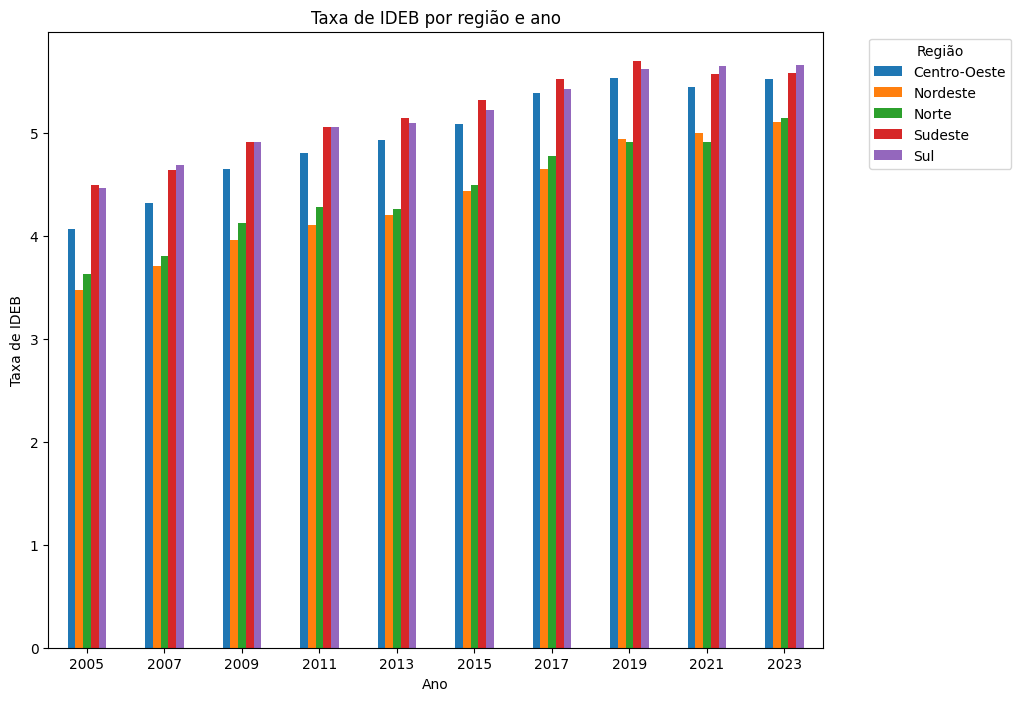

In [28]:
df_pivot_regiao_ano_ideb.plot(kind ='bar', figsize = (10,8))

plt.title('Taxa de IDEB por região e ano')
plt.xlabel('Ano')
plt.ylabel('Taxa de IDEB')
plt.legend(title='Região',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

Notamos que as regiões norte e nordeste sempre tiverem um IDEB menor do que as outras regiões. Porém, olhando o quadro geral, houve um aumento em todas as regiões ao longos dos anos, o que é algo positivo.

In [29]:
df_pivot_regiao_ano_aprovacao = df_ideb_agrupado_regiao.pivot(index = 'ano', columns='regiao',values = 'taxa_aprovacao')

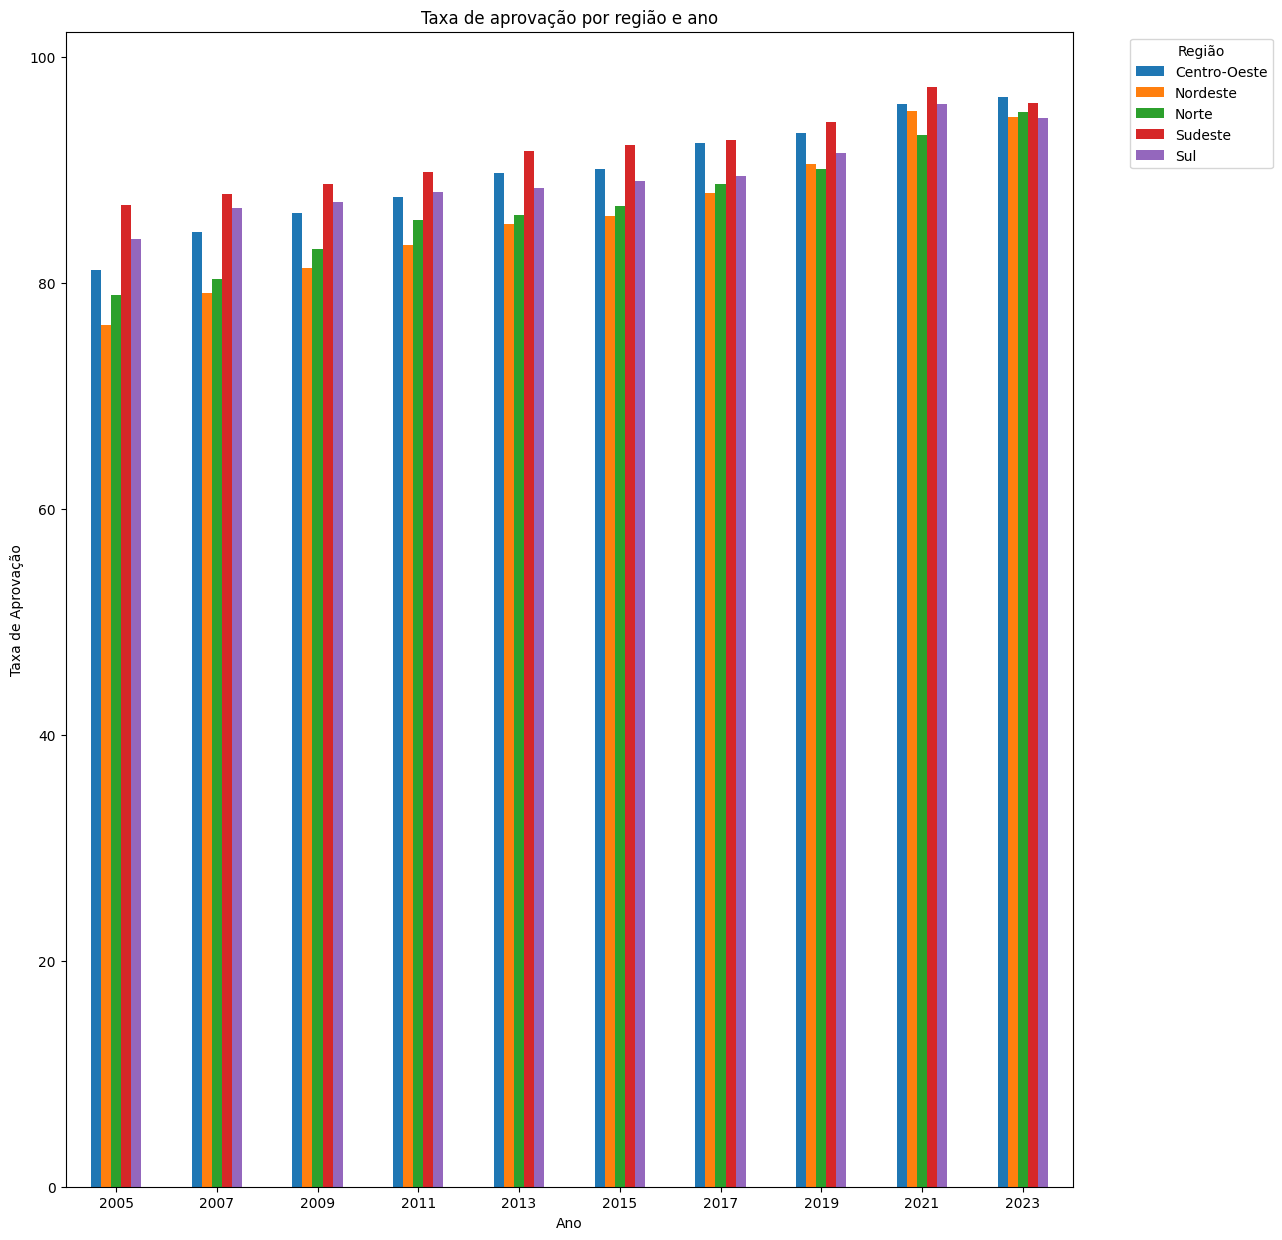

In [30]:
df_pivot_regiao_ano_aprovacao.plot(kind ='bar', figsize = (13,15))

plt.title('Taxa de aprovação por região e ano')
plt.xlabel('Ano')
plt.ylabel('Taxa de Aprovação')
plt.legend(title='Região',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

Ao analisarmos a taxa de aprovação, vemos que antigamente existia uma disparidade maior, porém hoje essa taxa está bem próxima, entre todas as regiões.

Como a localização geográfica afeta o desempenho e o acesso à educação básica e superior?

Vamos dar uma olhado em como o PIB de cada região se comporta, e tentar tirar alguma conclusão disso.

In [31]:
query_8 = """
SELECT
    regiao.id_regiao AS id_regiao,
    regiao.nome_regiao AS nome_regiao,
    dados_pib.ano AS ano,
    dados_pib.pib AS pib
FROM (
    SELECT
        id_regiao,
        ano,
        pib
    FROM `basedosdados.br_ibge_pib.regiao_antigo`
) AS dados_pib
JOIN `basedosdados.br_geobr_mapas.regiao` AS regiao
ON dados_pib.id_regiao = regiao.id_regiao
ORDER BY regiao.nome_regiao, dados_pib.ano;
"""

pib_regiao = bd.read_sql(query_8, billing_project_id=project_id)

Downloading: 100%|██████████|


In [32]:
pib_regiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_regiao    70 non-null     object
 1   nome_regiao  70 non-null     object
 2   ano          70 non-null     Int64 
 3   pib          70 non-null     Int64 
dtypes: Int64(2), object(2)
memory usage: 2.4+ KB


In [33]:
pib_regiao.head()

,id_regiao,nome_regiao,ano,pib
0,5,Centro Oeste,1999,93347648000
1,5,Centro Oeste,2000,98914837000
2,5,Centro Oeste,2001,110898874000
3,5,Centro Oeste,2002,129648586000
4,5,Centro Oeste,2003,153103630000


In [34]:
df_pivot_pib_regiao = pib_regiao.pivot(index = 'ano', columns='nome_regiao',values = 'pib')

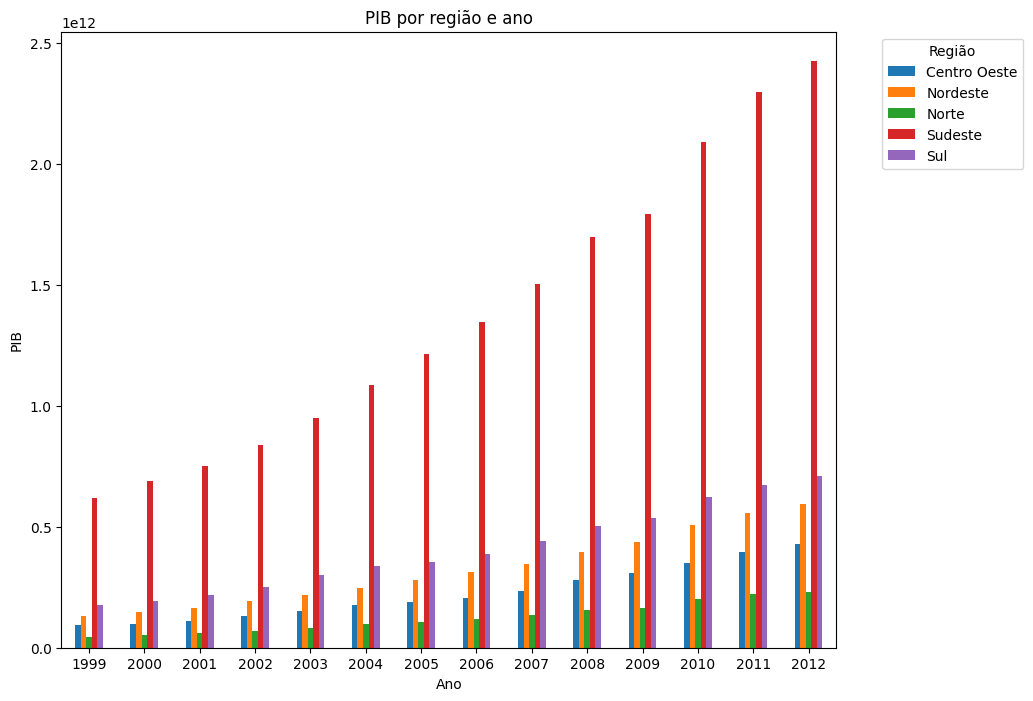

In [35]:
df_pivot_pib_regiao.plot(kind ='bar', figsize = (10,8))

plt.title('PIB por região e ano')
plt.xlabel('Ano')
plt.ylabel('PIB')
plt.legend(title='Região',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

Apesar do último ano avaliado disponível ser 2012, vemos que a diferença do PIB do sudeste é assustadoramente maior do que qualquer outra região, e isso acompanha a taxa IDEB, que segue quase a risca o PIB. Um fato curioso, é que apesar do PIB do nordeste ser maior do que o PIB do centro-oeste, o IDEB do centro-oeste é maior do que o do nordeste. Ou seja, existem outros fatores relacionados a taxa de desenvolvimente da educação numa região além de uma questão financeira.

Agora vamos olhar a taxa de abandono por região.

In [36]:
df_abondono_2022 = df_agrupado_abondono[df_agrupado_abondono['ano'] == 2022]

In [37]:
df_pivot_abandono_2022 = df_abondono_2022.pivot_table(
    index='regiao',   # Índices
    columns='rede',            # Colunas
    values=['taxa_abandono_ef', 'taxa_abandono_em'],# Valores
    aggfunc='mean'             # Função de agregação (caso tenha valores repetidos)
)

In [38]:
df_abondono_2007 = df_agrupado_abondono[df_agrupado_abondono['ano'] == 2007]

df_pivot_abandono_2007 = df_abondono_2007.pivot_table(
    index='regiao',   # Índices
    columns='rede',            # Colunas
    values=['taxa_abandono_ef', 'taxa_abandono_em'],# Valores
    aggfunc='mean'             # Função de agregação (caso tenha valores repetidos)
)

In [39]:
df_pivot_abandono_2022.head()

taxa_abandono_ef                                                  \
rede                 estadual federal municipal   privada   publica     total   
regiao                                                                          
Centro-Oeste         0.733333     0.0  0.600000  0.066667  0.666667  0.566667   
Nordeste             3.333333     0.1  1.900000  0.300000  2.000000  1.733333   
Norte                2.900000     0.0  2.350000  0.300000  2.900000  2.800000   
Sudeste              1.100000     0.2  0.500000  0.033333  0.733333  0.633333   
Sul                  1.000000     0.0  0.466667  0.033333  0.666667  0.566667   

             taxa_abandono_em                                            \
rede                 estadual   federal  municipal   privada    publica   
regiao                                                                    
Centro-Oeste         5.666667  2.300000   1.533333  0.500000   5.400000   
Nordeste             7.933333  2.633333  12.333333  3.166667   7.733333   
Norte               10.600000  1.650000   6.400000  1.600000  10.333333   
Sudeste              4.700000  1.500000   1.800000  1.033333   4.466667   
Sul                  6.433333  3.300000  10.766667  0.600000   6.266667   

                        
rede             total  
regiao                  
Centro-Oeste  4.866667  
Nordeste      7.266667  
Norte         9.900000  
Sudeste       4.000000  
Sul           5.633333

In [40]:
df_pivot_abandono_2007.head()

taxa_abandono_ef                                          \
rede                 estadual   federal municipal   privada   publica   
regiao                                                                  
Centro-Oeste         5.533333  0.100000  4.533333  0.600000  5.133333   
Nordeste            11.233333  0.666667  8.066667  1.300000  8.733333   
Norte                7.466667  0.200000  9.033333  1.066667  8.566667   
Sudeste              3.000000  0.200000  2.100000  0.400000  2.466667   
Sul                  2.666667  0.200000  1.000000  0.266667  1.766667   

                       taxa_abandono_em                               \
rede             total         estadual federal  municipal   privada   
regiao                                                                 
Centro-Oeste  4.766667        15.533333    0.55   6.033333  1.333333   
Nordeste      8.133333        20.633333    2.90  17.533333  1.166667   
Norte         8.300000        16.166667    3.55  14.800000  1.300000   
Sudeste       2.300000         9.733333    3.50   8.066667  0.666667   
Sul           1.666667        10.266667    2.25  17.400000  0.500000   

                                    
rede            publica      total  
regiao                              
Centro-Oeste  15.066667  13.566667  
Nordeste      20.033333  18.966667  
Norte         15.933333  15.100000  
Sudeste        9.533333   8.666667  
Sul           10.300000   9.366667

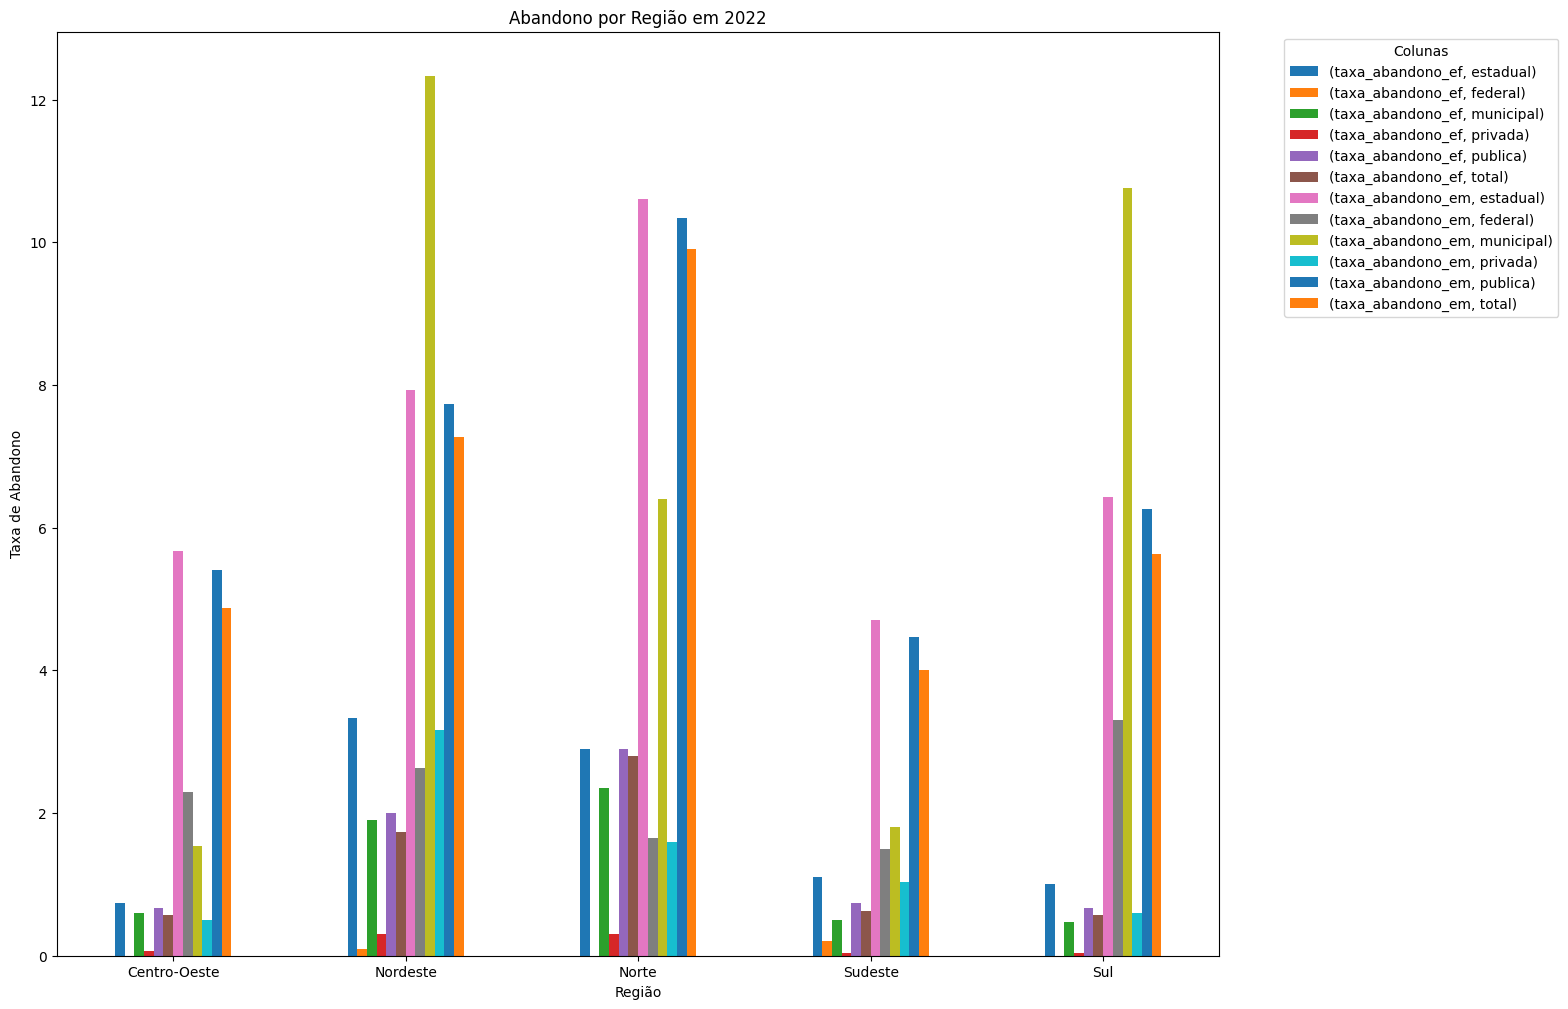

In [41]:
df_pivot_abandono_2022.plot(kind ='bar', figsize = (15,12))

plt.title('Abandono por Região em 2022')
plt.xlabel('Região')
plt.ylabel('Taxa de Abandono')
plt.legend(title='Colunas',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

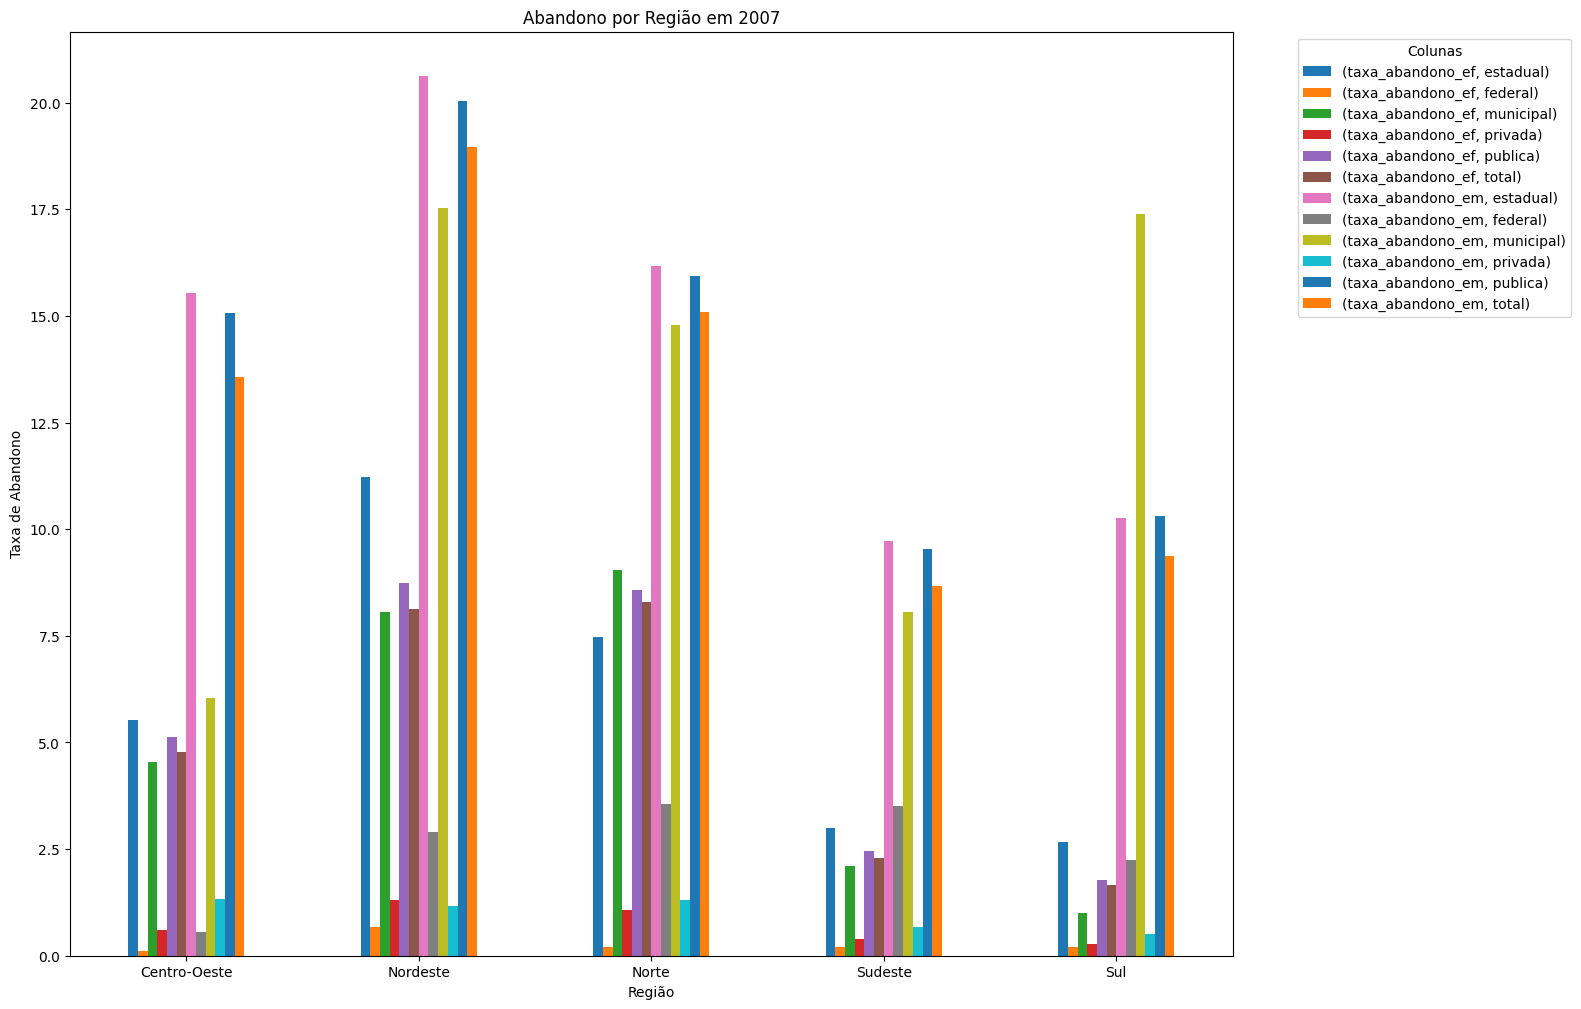

In [42]:
df_pivot_abandono_2007.plot(kind ='bar', figsize = (15,12))

plt.title('Abandono por Região em 2007')
plt.xlabel('Região')
plt.ylabel('Taxa de Abandono')
plt.legend(title='Colunas',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

Tendo tudo isso em mente, fica evidente que sim, a região interfere nas condições de estudo e acesso a oportunidades de ensino.

## Aspectos Socioeconômicos

Qual a relação entre a renda familiar e o acesso à educação de qualidade?

Aqui irei tratar de educação de ensino superior

In [43]:
df_enem_id_match = df_enem_2022[df_enem_2022['id_inscricao'].isin(df_match_id_filter['id_inscricao'])]  

In [44]:
df_enem_id_match.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128065 entries, 4 to 659246
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ano                       128065 non-null  Int64  
 1   id_inscricao              128065 non-null  object 
 2   cor_raca                  128065 non-null  object 
 3   tipo_escola               128065 non-null  object 
 4   ensino                    124483 non-null  object 
 5   id_municipio_escola       128065 non-null  object 
 6   id_municipio_escola_nome  128065 non-null  object 
 7   localizacao_escola        128065 non-null  object 
 8   presenca_matematica       128065 non-null  object 
 9   nota_ciencias_natureza    128065 non-null  float64
 10  nota_ciencias_humanas     128065 non-null  float64
 11  nota_linguagens_codigos   128065 non-null  float64
 12  nota_matematica           128065 non-null  float64
 13  presenca_redacao          128065 non-null  object

In [45]:
df_enem_id_match.head(25)

,ano,id_inscricao,cor_raca,tipo_escola,ensino,id_municipio_escola,id_municipio_escola_nome,localizacao_escola,presenca_matematica,nota_ciencias_natureza,nota_ciencias_humanas,nota_linguagens_codigos,nota_matematica,presenca_redacao,nota_redacao
4,2022,210057712874,Parda,Pública,Ensino Regular,2305407,Icó,Urbana,Presente na prova,406.0,389.6,380.2,389.7,Sem problemas,280.0
9,2022,210057308126,Branca,Privada,Ensino Regular,2408003,Mossoró,Urbana,Presente na prova,591.5,619.0,555.7,591.7,Sem problemas,980.0
11,2022,210055249439,Parda,Pública,Ensino Regular,2311405,Quixeramobim,Rural,Presente na prova,530.3,498.7,429.0,373.5,Sem problemas,300.0
13,2022,210057784375,Amarela,Pública,Ensino Regular,4216800,São José do Cerrito,Rural,Presente na prova,627.0,498.7,449.0,521.6,Sem problemas,260.0
17,2022,210055403131,Parda,Pública,Ensino Regular,2307809,Marco,Rural,Presente na prova,536.3,366.4,391.9,477.2,Sem problemas,200.0
21,2022,210056671342,Parda,Pública,Ensino Regular,2302404,Boa Viagem,Urbana,Presente na prova,415.1,355.5,338.4,440.6,Sem problemas,100.0
24,2022,210056700276,Preta,Pública,Ensino de Jovens e Adultos,4208203,Itajaí,Urbana,Presente na prova,380.7,379.1,372.6,424.2,Sem problemas,280.0
25,2022,210055151685,Parda,Pública,Ensino Regular,2923803,Paripiranga,Urbana,Presente na prova,463.2,451.6,391.3,409.6,Sem problemas,260.0
26,2022,210055380116,Parda,Pública,Ensino Regular,2302305,Bela Cruz,Urbana,Presente na prova,405.8,373.1,400.4,382.4,Sem problemas,240.0
33,2022,210056149318,Parda,Pública,Ensino Regular,2304400,Fortaleza,Urbana,Presente na prova,408.4,476.9,420.1,409.2,Sem problemas,280.0


In [46]:
df_enem_id_match['Nota geral'] = df_enem_id_match[['nota_ciencias_humanas','nota_ciencias_natureza','nota_linguagens_codigos','nota_matematica']].sum(axis=1)

In [47]:
df_enem_id_match = df_enem_id_match.sort_values(by='Nota geral',ascending=False).reset_index()

In [48]:
df_enem_id_match.head()

,index,ano,id_inscricao,cor_raca,tipo_escola,ensino,id_municipio_escola,id_municipio_escola_nome,localizacao_escola,presenca_matematica,nota_ciencias_natureza,nota_ciencias_humanas,nota_linguagens_codigos,nota_matematica,presenca_redacao,nota_redacao,Nota geral
0,163401,2022,210057680522,Branca,Privada,Ensino Regular,2207702,Parnaíba,Urbana,Presente na prova,764.0,755.6,671.0,926.8,Sem problemas,900.0,3117.4
1,96486,2022,210055315315,Parda,Privada,Ensino Regular,2304400,Fortaleza,Urbana,Presente na prova,717.6,789.8,666.2,911.4,Sem problemas,960.0,3085.0
2,2920,2022,210055380630,Branca,Pública,Ensino Regular,4201208,Antônio Carlos,Urbana,Presente na prova,726.5,723.4,678.1,952.4,Sem problemas,980.0,3080.4
3,577452,2022,210055065586,Branca,Pública,Ensino Regular,2611606,Recife,Urbana,Presente na prova,712.2,720.4,700.3,945.1,Sem problemas,920.0,3078.0
4,167269,2022,210056012033,Branca,Pública,Ensino Regular,3550308,São Paulo,Urbana,Presente na prova,819.5,684.9,657.8,905.5,Sem problemas,900.0,3067.7


In [49]:
df_enem_2022_socioeconomico_match = df_enem_2022_socioeconomico[df_enem_2022_socioeconomico['id_inscricao'].isin(df_match_id_filter['id_inscricao'])]  

In [50]:
df_enem_2022_socioeconomico_match.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128065 entries, 10 to 999991
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_inscricao  128065 non-null  object
 1   Q001          128065 non-null  object
 2   Q002          128065 non-null  object
 3   Q003          128065 non-null  object
 4   Q004          128065 non-null  object
 5   Q005          128065 non-null  object
 6   Q006          128065 non-null  object
 7   Q007          128065 non-null  object
 8   Q008          128065 non-null  object
 9   Q009          128065 non-null  object
 10  Q010          128065 non-null  object
 11  Q011          128065 non-null  object
 12  Q012          128065 non-null  object
 13  Q013          128065 non-null  object
 14  Q014          128065 non-null  object
 15  Q015          128065 non-null  object
 16  Q016          128065 non-null  object
 17  Q017          128065 non-null  object
 18  Q018          128065 non-nul

In [51]:
df_enem_2022_socioeconomico_match = df_enem_2022_socioeconomico_match.merge(df_enem_id_match[['id_inscricao', 'Nota geral']], on='id_inscricao', how='left')

In [52]:
df_enem_2022_socioeconomico_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128065 entries, 0 to 128064
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_inscricao  128065 non-null  object 
 1   Q001          128065 non-null  object 
 2   Q002          128065 non-null  object 
 3   Q003          128065 non-null  object 
 4   Q004          128065 non-null  object 
 5   Q005          128065 non-null  object 
 6   Q006          128065 non-null  object 
 7   Q007          128065 non-null  object 
 8   Q008          128065 non-null  object 
 9   Q009          128065 non-null  object 
 10  Q010          128065 non-null  object 
 11  Q011          128065 non-null  object 
 12  Q012          128065 non-null  object 
 13  Q013          128065 non-null  object 
 14  Q014          128065 non-null  object 
 15  Q015          128065 non-null  object 
 16  Q016          128065 non-null  object 
 17  Q017          128065 non-null  object 
 18  Q018

In [53]:
df_enem_2022_socioeconomico_match = df_enem_2022_socioeconomico_match.sort_values(by='Nota geral',ascending=False).reset_index()

In [54]:
df_enem_2022_socioeconomico_match.head(20)

,index,id_inscricao,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Nota geral
0,86381,210057680522,"Completou a 4ª série/5º ano, mas não completou...","Completou a Faculdade, mas não completou a Pós...",Grupo 4: Professor (de ensino fundamental ou m...,Não sei.,4,"De R$ 3.636,01 até R$ 4.848,00.","Sim, um ou dois dias por semana.","Sim, três.",...,Não.,Sim.,"Sim, duas.",Não.,Não.,"Sim, quatro ou mais.",Sim.,Não.,Sim.,3117.4
1,99656,210055315315,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou a 4ª série/5º ano, mas não completou...",Grupo 4: Professor (de ensino fundamental ou m...,Grupo 4: Professora (de ensino fundamental ou ...,4,"De R$ 12.120,01 até R$ 14.544,00.","Sim, pelo menos cinco dias por semana.","Sim, quatro ou mais.",...,Não.,Não.,"Sim, quatro ou mais.",Não.,Não.,"Sim, quatro ou mais.",Não.,"Sim, dois.",Sim.,3085.0
2,25795,210055380630,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...","Grupo 1: Lavrador, agricultor sem empregados, ...","Grupo 1: Lavradora, agricultora sem empregados...",5,"De R$ 7.272,01 até R$ 8.484,00.",Não.,"Sim, três.",...,Não.,Sim.,"Sim, três.",Sim.,Sim.,"Sim, três.",Sim.,"Sim, um.",Sim.,3080.4
3,76413,210055065586,"Completou a Faculdade, mas não completou a Pós...","Completou a Faculdade, mas não completou a Pós...","Grupo 2: Diarista, empregado doméstico, cuidad...","Grupo 2: Diarista, empregada doméstica, cuidad...",6,"Até R$ 1.212,00",Não.,"Sim, um.",...,Não.,Não.,"Sim, uma.",Não.,Sim.,"Sim, três.",Não.,Não.,Sim.,3078.0
4,90246,210056012033,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou a Faculdade, mas não completou a Pós...","Grupo 2: Diarista, empregado doméstico, cuidad...",Grupo 4: Professora (de ensino fundamental ou ...,4,"De R$ 2.424,01 até R$ 3.030,00.",Não.,"Sim, um.",...,Não.,Não.,"Sim, uma.",Não.,Não.,"Sim, quatro ou mais.",Não.,"Sim, um.",Sim.,3067.7
5,38228,210056815527,"Completou a 4ª série/5º ano, mas não completou...","Completou a Faculdade, mas não completou a Pós...","Grupo 1: Lavrador, agricultor sem empregados, ...",Grupo 4: Professora (de ensino fundamental ou ...,2,"De R$ 1.818,01 até R$ 2.424,00.",Não.,"Sim, um.",...,Não.,Não.,"Sim, duas.",Não.,Não.,"Sim, dois.",Não.,"Sim, um.",Sim.,3055.4
6,39073,210056814937,"Completou a 4ª série/5º ano, mas não completou...",Completou a Pós-graduação.,Grupo 4: Professor (de ensino fundamental ou m...,Grupo 4: Professora (de ensino fundamental ou ...,3,"De R$ 3.030,01 até R$ 3.636,00.","Sim, pelo menos cinco dias por semana.","Sim, dois.",...,Não.,Não.,"Sim, três.",Sim.,Sim.,"Sim, dois.",Não.,"Sim, um.",Sim.,2991.4
7,111341,210055590369,"Completou o Ensino Médio, mas não completou a ...","Completou a 4ª série/5º ano, mas não completou...",Grupo 4: Professor (de ensino fundamental ou m...,"Grupo 3: Padeira, cozinheira industrial ou em ...",3,"De R$ 4.848,01 até R$ 6.060,00.",Não.,"Sim, dois.",...,Não.,Não.,"Sim, uma.",Não.,Sim.,"Sim, três.",Sim.,"Sim, dois.",Sim.,2981.0
8,52877,210055292974,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou o Ensino Médio, mas não completou a ...",Grupo 4: Professor (de ensino fundamental ou m...,Grupo 4: Professora (de ensino fundamental ou ...,2,"De R$ 4.848,01 até R$ 6.060,00.",Não.,"Sim, três.",...,Não.,Não.,Não.,Não.,Não.,"Sim, dois.",Não.,"Sim, um.",Sim.,2977.1
9,57071,210057773037,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ...","Grupo 2: Diarista, empregado doméstico, cuidad...","Grupo 2: Diarista, empregada doméstica, cuidad...",4,"De R$ 3.636,01 até R$ 4.848,00.",Não.,"Sim, um.",...,Não.,Sim.,"Sim, três.",Sim.,Não.,"Sim, quatro ou mais.",Sim.,"Sim, um.",Sim.,2973.8


In [55]:
media_nota_por_renda = df_enem_2022_socioeconomico_match.groupby('Q006')['Nota geral'].mean().reset_index().sort_values(by='Nota geral', ascending=False)

In [56]:
media_nota_por_renda.head()

,Q006,Nota geral
7,"De R$ 18.180,01 até R$ 24.240,00.",2273.528571
6,"De R$ 14.544,01 até R$ 18.180,00.",2265.575410
5,"De R$ 12.120,01 até R$ 14.544,00.",2236.383036
14,"De R$ 8.484,01 até R$ 9.696,00.",2212.751867
0,"Acima de R$ 24.240,00.",2207.408442


In [57]:
df_pivot_nota_renda = media_nota_por_renda.set_index('Q006')

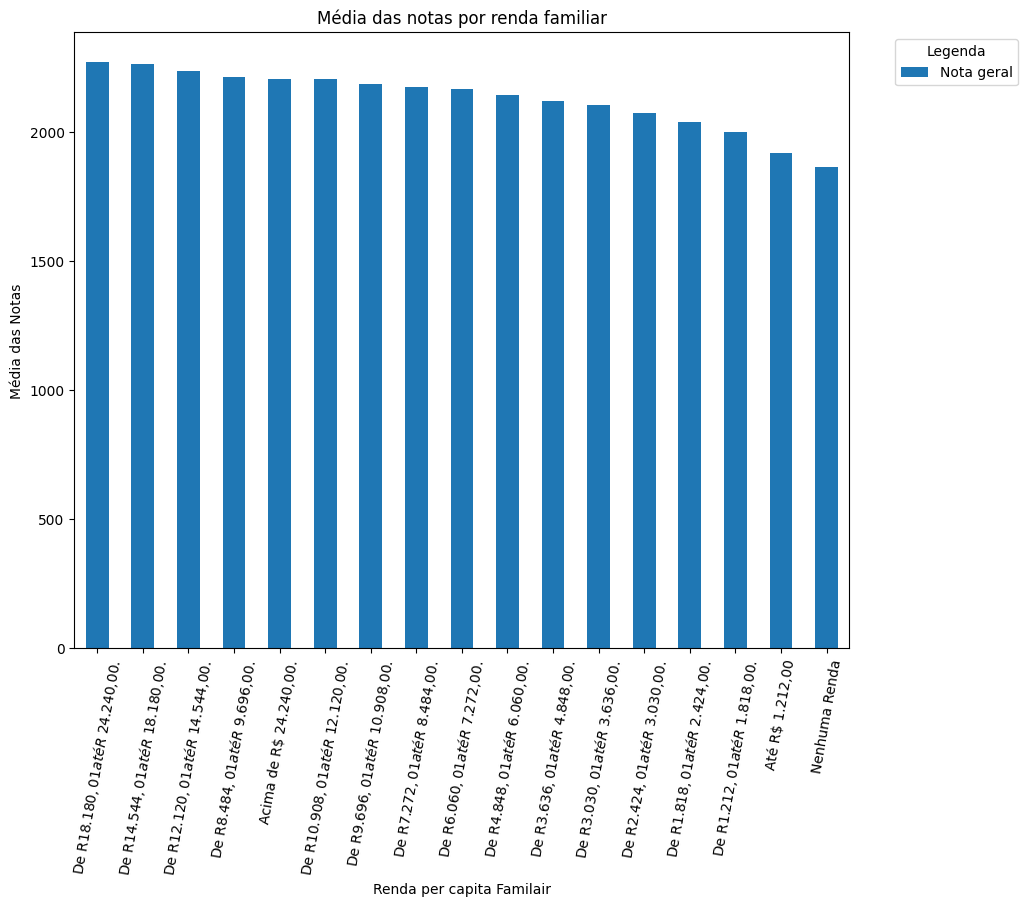

In [58]:
df_pivot_nota_renda.plot(kind ='bar', figsize = (10,8))

plt.title('Média das notas por renda familiar')
plt.xlabel('Renda per capita Familair')
plt.ylabel('Média das Notas')
plt.legend(title='Legenda',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=80)

plt.show()

Dessa forma, vemos que quanto maior a renda per capita familiar, maiores são as notas dos inscritos.

Como a escolaridade dos pais influencia o desempenho educacional dos alunos?

In [59]:
media_nota_por_escolaridade_pais = df_enem_2022_socioeconomico_match.groupby(['Q001','Q002'])['Nota geral'].mean().reset_index().sort_values(by='Nota geral', ascending=False)

In [60]:
media_nota_por_escolaridade_pais.head(25)

,Q001,Q002,Nota geral
21,"Completou a Faculdade, mas não completou a Pós...",Nunca estudou.,2219.060000
19,"Completou a Faculdade, mas não completou a Pós...",Completou a Pós-graduação.,2195.154902
18,"Completou a Faculdade, mas não completou a Pós...","Completou a Faculdade, mas não completou a Pós...",2182.961905
26,Completou a Pós-graduação.,Completou a Pós-graduação.,2180.044828
11,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a Pós-graduação.,2149.245825
10,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou a Faculdade, mas não completou a Pós...",2135.388028
27,Completou a Pós-graduação.,"Completou o Ensino Médio, mas não completou a ...",2125.500000
16,"Completou a Faculdade, mas não completou a Pós...","Completou a 4ª série/5º ano, mas não completou...",2113.977619
20,"Completou a Faculdade, mas não completou a Pós...","Completou o Ensino Médio, mas não completou a ...",2110.758475
2,"Completou a 4ª série/5º ano, mas não completou...","Completou a Faculdade, mas não completou a Pós...",2096.627417


Vemos que, quando pelo menos um dos pais completou a faculdade as notas dos inscritos aumentam, salvo algumas exceções.

Existem diferenças significativas entre as áreas urbanas e rurais em relação à qualidade e ao acesso à educação?

In [61]:
media_nota_por_zona = df_enem_id_match.groupby('localizacao_escola')['Nota geral'].mean().reset_index().sort_values(by='Nota geral', ascending=False)

In [62]:
media_nota_por_zona.head()

,localizacao_escola,Nota geral
1,Urbana,1972.737927
0,Rural,1916.672375


In [63]:
df_pivot_nota_zona = media_nota_por_zona.set_index('localizacao_escola')

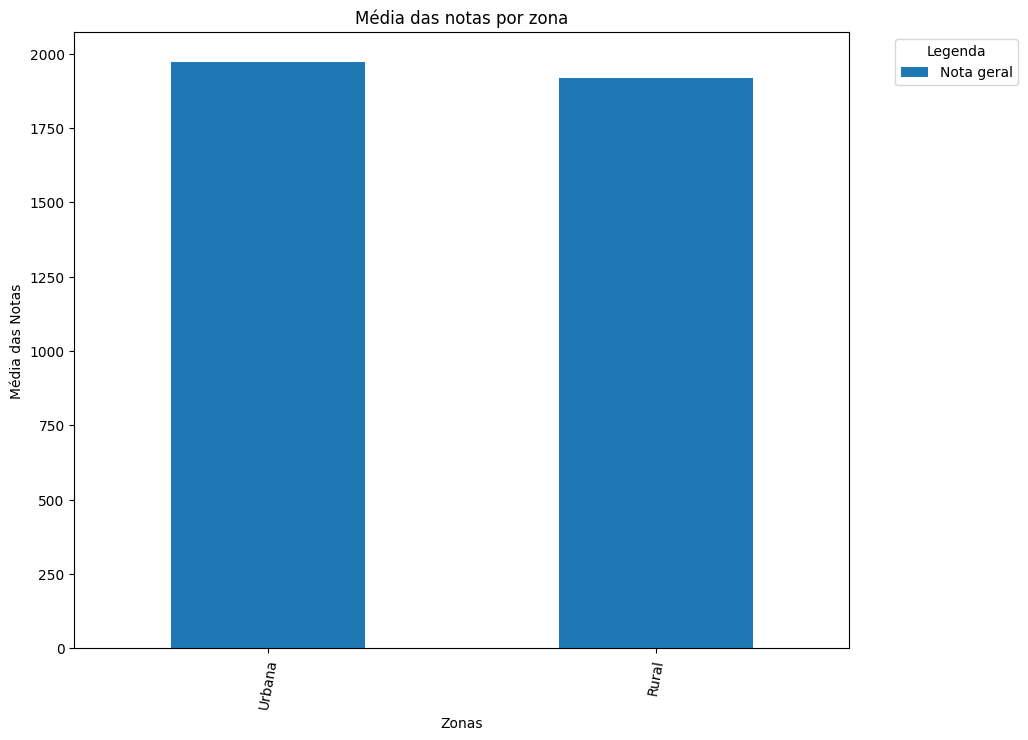

In [64]:
df_pivot_nota_zona.plot(kind ='bar', figsize = (10,8))

plt.title('Média das notas por zona')
plt.xlabel('Zonas')
plt.ylabel('Média das Notas')
plt.legend(title='Legenda',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=80)

plt.show()

Vemos que existe sim um diferença, mas avaliando as médias, é uma diferença muito pouca.

## Diferenças Raciais e Étnicas

Como raça e etnia impactam o desempenho escolar e as oportunidades educacionais?

Irei utilizar como parametro o Enem para avaliar essas questões, sei que não é uma avaliação precisa, porque o Enem diz muito mais se você sabe realizar aquela prova em especifico, do que como foi seu desempenho escolar anterior, porém deve ser uma métrica suficiente para nosso propósito.

In [65]:
df_enem_2022_raca = df_enem_id_match.groupby('cor_raca').agg({
    'Nota geral': 'mean',            
}).sort_values(by=['Nota geral'], ascending=False).reset_index()


In [66]:
df_enem_2022_raca = df_enem_2022_raca.rename(columns={'Nota geral': 'Média da Nota Geral'})
df_enem_2022_raca.head(7)

,cor_raca,Média da Nota Geral
0,Branca,2040.992179
1,Amarela,1947.266346
2,Não declarado,1938.549022
3,Preta,1938.476387
4,Parda,1934.617988
5,Indígena,1841.261638


In [67]:
df_enem_2022_raca_pivot = df_enem_2022_raca.set_index('cor_raca')

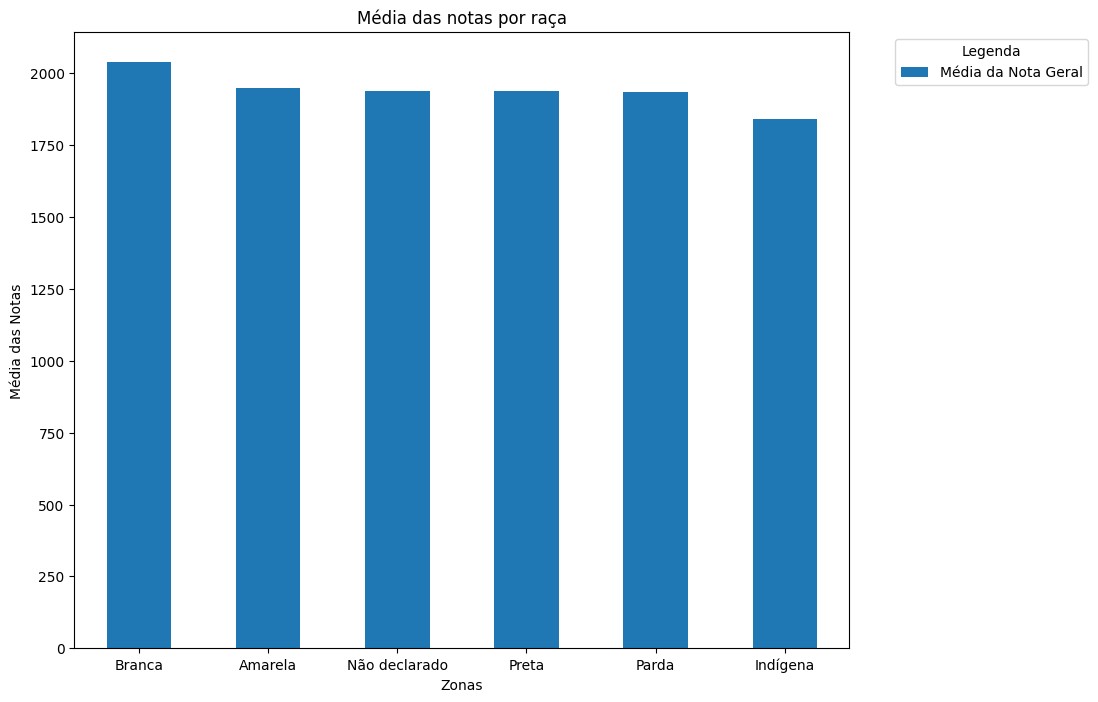

In [68]:
df_enem_2022_raca_pivot.plot(kind ='bar', figsize = (10,8))

plt.title('Média das notas por raça')
plt.xlabel('Zonas')
plt.ylabel('Média das Notas')
plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

Vemos que sim, existe um diferença e era exatamente o que eu esperava encontrar como resposta.

Quais grupos raciais têm menor ou maior acesso a oportunidades de ensino superior?<BR>

Vemos que a raça branca tem a maior nota e a indigena com a pior média.

## Comparação Entre Setores Público e Privado

Quais são as diferenças de desempenho entre estudantes de escolas públicas e privadas?

In [69]:
df_enem_rede = df_enem_id_match.pivot_table(
    index='tipo_escola',          
    values="Nota geral",
    aggfunc='mean'            
)

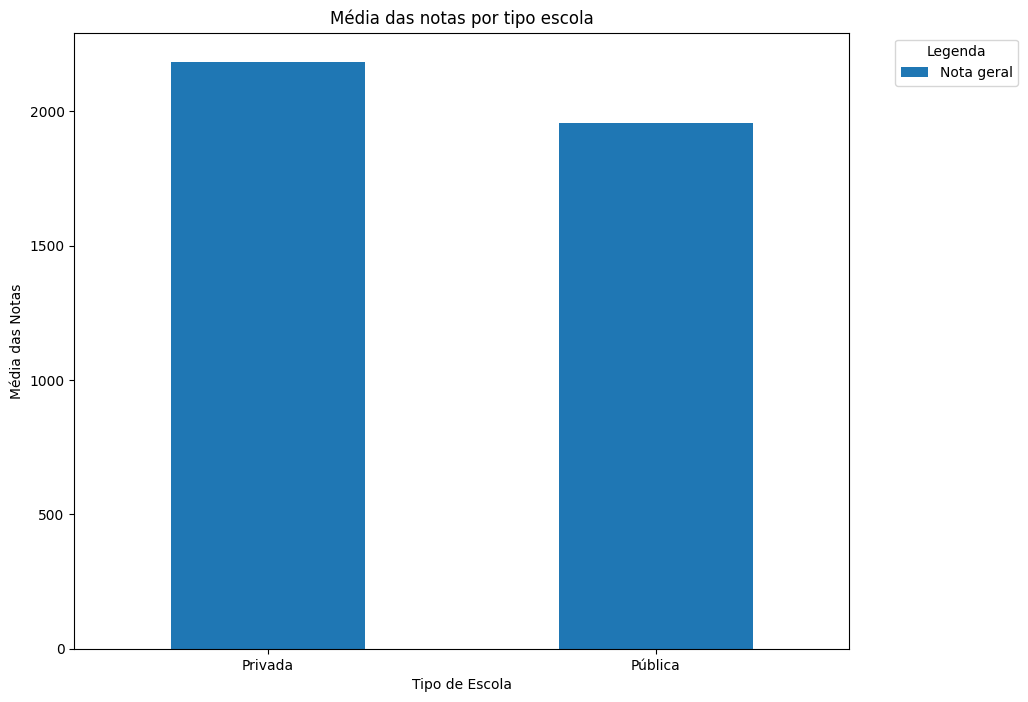

In [70]:
df_enem_rede.plot(kind ='bar', figsize = (10,8))

plt.title('Média das notas por tipo escola')
plt.xlabel('Tipo de Escola')
plt.ylabel('Média das Notas')
plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

Vemos que fica claro que a média das notas para acesso ao ensino superior são maiores dos alunos que vieram de escolas privadas.

## Fatores Associados ao Abandono Escolar

Existem grupos ou regiões onde o abandono escolar é mais frequente?

Já vimos anteriormente esses dados sobre o abandono escolar, e sim, existe uma diferença significativa sobre o abandono escolar quando analisamos sobre as regiões e rede escolar.

Dessa forma, finalizo o EDA sobre esses dados. Utilei os seguintes Datasets:<br>
<br>
basedosdados.br_ibge_pib.regiao_antigo<br>
basedosdados.br_inep_indicadores_educacionais.regiao<br>
basedosdados.br_inep_enem.microdados<br>
basedosdados.br_inep_enem.questionario_socioeconomico_2022<br>
basedosdados.br_inep_ideb.municipio<br>
basedosdados.br_inep_ideb.regiao<br>
basedosdados.br_inep_ideb.brasil<br>